In [1]:
import ydf
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

2025-05-10 22:33:30.939865: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746909210.957905  304130 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746909210.963220  304130 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746909210.977080  304130 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746909210.977097  304130 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746909210.977099  304130 computation_placer.cc:177] computation placer alr

In [2]:
from DataLoader import DataLoader

In [3]:
dataset = DataLoader('../dataset/splitted-animations', 0.8).load_dataset()

Loading dataset


100%|██████████| 9951/9951 [02:14<00:00, 73.86it/s]


In [4]:
model = ydf.from_tensorflow_decision_forests(directory="/home/_alk222/Documentos/uni/tfg/src/Models/models/best_rf_0.8")

In [5]:
num_trees=200
max_depth=15
min_examples=2

In [6]:
model.describe(output_format="notebook")

trial,score,duration,num_trees,max_depth,min_examples
15,0.836516,68.8813,200,15,2
19,0.831491,100.637,200,15,5
24,0.829146,127.149,100,15,2
25,0.823283,133.84,100,15,5
12,0.818425,46.4889,200,15,8
16,0.816918,81.7535,200,15,10
27,0.816583,152.914,150,15,8
18,0.813903,87.5714,50,15,2
14,0.810385,55.3735,100,15,8
3,0.806365,16.8924,50,15,5


In [7]:
model.plot_tree()

In [8]:
columns = pd.read_csv('../dataset/full_animations/dance_0.csv').columns
new_columns = []
for rep in range(1,3):
    for column in columns:
        column_name = column + '_' + str(rep)
        new_columns.append(column_name)

In [9]:
model_retrain_learner = ydf.RandomForestLearner(
    num_trees=num_trees,
    max_depth=max_depth,
    min_examples=min_examples,
    task=ydf.Task.CLASSIFICATION,
    label="label",
    random_seed=42
)

train_data, test_data = train_test_split(
            dataset, test_size=0.40, random_state=42)
test_data, val_data = train_test_split(
    test_data, test_size=0.50, random_state=42)
y_train, X_train = zip(*train_data)
y_test, X_test = zip(*test_data)
y_val, X_val = zip(*val_data)

X_train = np.array(X_train, dtype=np.float32)

X_test = np.array(X_test, dtype=np.float32)

X_val = np.array(X_val, dtype=np.float32)


X_reshaped = X_train.reshape(X_train.shape[0], -1)
df_train = pd.DataFrame(
    X_reshaped, columns=new_columns)

X_val_reshaped = X_val.reshape(X_val.shape[0], -1)
df_val = pd.DataFrame(
    X_val_reshaped, columns=new_columns)

X_test_reshaped = X_test.reshape(X_test.shape[0], -1)
df_test = pd.DataFrame(
    X_test_reshaped, columns=new_columns)


# Ensure 'label' column is added and is of string type
df_train['label'] = y_train
df_val['label'] = y_val
df_test['label'] = y_test


model_retrained = model_retrain_learner.train(df_train)


Train model on 5970 examples
Model trained in 0:00:08.458939


In [10]:
model_retrained.describe(output_format="notebook")

In [11]:
model_retrained.evaluate(df_test)

Label \ Pred,dance,fight,greeting,point,run,sit
dance,401,1,0,0,0,1
fight,40,266,8,3,28,11
greeting,1,10,281,5,3,5
point,3,19,80,115,2,6
run,16,26,6,1,252,5
sit,11,20,17,2,6,339


In [13]:
best_lstm = tf.keras.models.load_model(
    "/home/_alk222/Documentos/uni/tfg/src/Models/models/best-lstm0.8.keras")

In [14]:
best_lstm.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 6)              │         7,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │            42 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,232 (86.85 KB)

 Trainable params: 7,410 (28.95 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,822 (57.90 KB)

In [15]:
from tensorflow.keras.utils import plot_model

In [16]:
from tensorflow.keras.utils import model_to_dot

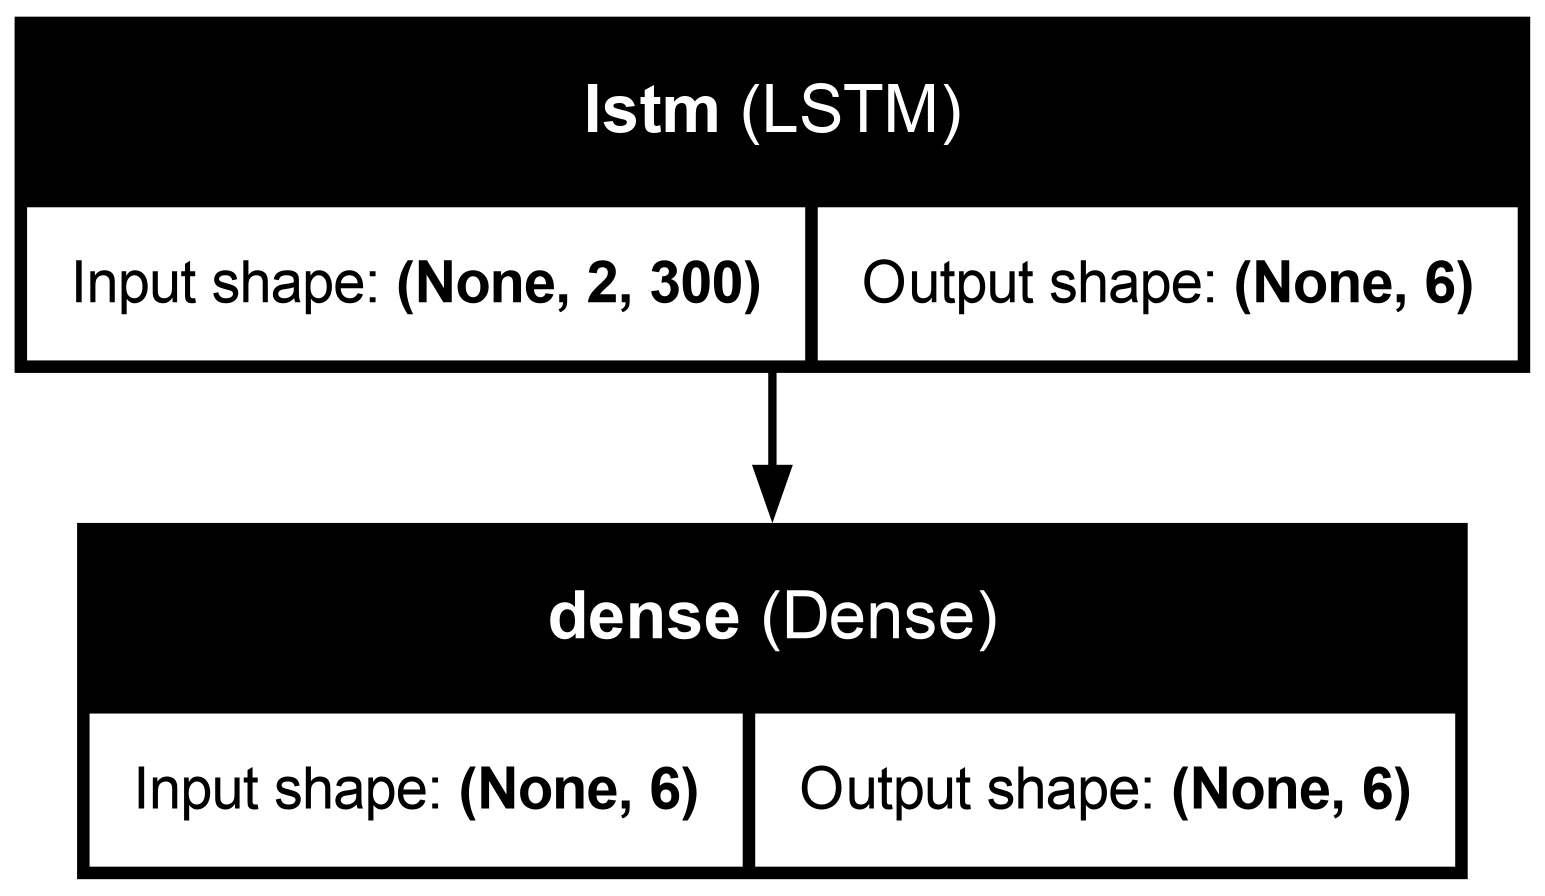

In [17]:
plot_model(
    best_lstm,
    to_file='lstm-0,8.png',
    show_shapes=True,
    show_layer_names=True,
    dpi=300
)

In [23]:
import glob
import os
for model_file in glob.glob(
        "/home/_alk222/Documentos/uni/tfg/src/Models/models/*.keras"):
        try:
            model = tf.keras.models.load_model(model_file)
            # model.summary()
            plot_model(
                model,
                to_file=os.path.join('Images', '' + model_file.split('/')[-1].split('.')[0] + "." + model_file.split('/')[-1].split('.')[1]  + '.png'),
                show_shapes=True,
                show_layer_names=True,
                dpi=300
            )
        except Exception as e:
            print(f"Error loading model {model_file}: {e}")

Error loading model /home/_alk222/Documentos/uni/tfg/src/Models/models/best-rf0.2.keras: Could not locate class 'InferenceCoreModel'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'tensorflow_decision_forests.keras.core_inference', 'class_name': 'InferenceCoreModel', 'config': {}, 'registered_name': 'InferenceCoreModel', 'build_config': {'input_shape': {'feature_0': [None], 'feature_1': [None], 'feature_2': [None], 'feature_3': [None], 'feature_4': [None], 'feature_5': [None], 'feature_6': [None], 'feature_7': [None], 'feature_8': [None], 'feature_9': [None], 'feature_10': [None], 'feature_11': [None], 'feature_12': [None], 'feature_13': [None], 'feature_14': [None], 'feature_15': [None], 'feature_16': [None], 'feature_17': [None], 'feature_18': [None], 'feature_19': [None], 'feature_20': [None], 'feature_21': [None], 'feature_22': [None], 'feature_23': [None], 'feature_24': [None], 'feature_25': [None], 'featu

/home/_alk222/Documentos/uni/tfg/.venv/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 12 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Error loading model /home/_alk222/Documentos/uni/tfg/src/Models/models/best-rf0.4.keras: Could not locate class 'InferenceCoreModel'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'tensorflow_decision_forests.keras.core_inference', 'class_name': 'InferenceCoreModel', 'config': {}, 'registered_name': 'InferenceCoreModel', 'build_config': {'input_shape': {'feature_0': [None], 'feature_1': [None], 'feature_2': [None], 'feature_3': [None], 'feature_4': [None], 'feature_5': [None], 'feature_6': [None], 'feature_7': [None], 'feature_8': [None], 'feature_9': [None], 'feature_10': [None], 'feature_11': [None], 'feature_12': [None], 'feature_13': [None], 'feature_14': [None], 'feature_15': [None], 'feature_16': [None], 'feature_17': [None], 'feature_18': [None], 'feature_19': [None], 'feature_20': [None], 'feature_21': [None], 'feature_22': [None], 'feature_23': [None], 'feature_24': [None], 'feature_25': [None], 'featu

/home/_alk222/Documentos/uni/tfg/.venv/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 12 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Error loading model /home/_alk222/Documentos/uni/tfg/src/Models/models/best-rf0.8.keras: Could not locate class 'InferenceCoreModel'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'tensorflow_decision_forests.keras.core_inference', 'class_name': 'InferenceCoreModel', 'config': {}, 'registered_name': 'InferenceCoreModel', 'build_config': {'input_shape': {'feature_0': [None], 'feature_1': [None], 'feature_2': [None], 'feature_3': [None], 'feature_4': [None], 'feature_5': [None], 'feature_6': [None], 'feature_7': [None], 'feature_8': [None], 'feature_9': [None], 'feature_10': [None], 'feature_11': [None], 'feature_12': [None], 'feature_13': [None], 'feature_14': [None], 'feature_15': [None], 'feature_16': [None], 'feature_17': [None], 'feature_18': [None], 'feature_19': [None], 'feature_20': [None], 'feature_21': [None], 'feature_22': [None], 'feature_23': [None], 'feature_24': [None], 'feature_25': [None], 'featu